## Problem Statement

### Predict whether patient will recieve h1n1 vacccine and seasonal flu vaccine given some medical and behavioural attributes of the person. Some people might get the h1n1 vaccine some might get seasonal flu vaccine or some may get both of them. Problem is a mult label classification problem.

### Submission must include respondent_id along with boolean values of h1n1_vaccine and seasonal_vaccine

In [55]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [56]:
test_set_features_df = pd.read_csv('test_set_features.csv')
train_set_features_df = pd.read_csv('training_set_features.csv')
train_set_labels_df = pd.read_csv('training_set_labels.csv')

# Join labels and features
train_set_features_df = train_set_features_df.join(train_set_labels_df.set_index('respondent_id'), on='respondent_id')

### Read Data

In [57]:
## Training data
print(f"Train data {train_set_features_df.shape}")
print(f"Train columns {train_set_features_df.columns}")
print("")
print(f"Test data {test_set_features_df.shape}")

Train data (26707, 38)
Train columns Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

Test data (26708, 36)


In [58]:
train_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [59]:
# Check for NaN values
train_set_features_df.isnull().any()

respondent_id                  False
h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                       True
race                           False
sex                            False
income_poverty                  True
m

Most of the columns have null values

Column Details:

<b>h1n1_concern</b> - Level of concern about h1n1 flu

<b>h1n1_knowledge</b> - Level of knowledge about h1n1 flu

<b>behavioral_antiviral_meds</b> - Has taken anitviral medications

<b>behavioral_avoidance</b> - Has avoided close contact with others with flu-like symptons

<b>behavioural_face_mask</b> - Has bought a face mask

<b>behavioral_wash_hands</b> - Has frequently washed hands or used sanitzer

<b>behavioral_large_gatherings</b> - Has reduced time at large gatherings

<b>behavioral_outside_home</b> - Has reduced contact with people outisde

<b>behavioral_touch_face</b> - Has avoided touching eyes, nose or mouth

<b>doctor_recc_h1n1</b> - h1n1 flu vaccine recommened by doctor

<b>doctor_recc_seasonal</b> - seasonal flu  vaccine recommeded by doctor

<b>chronic_med_condition</b> - Has chronic condition 

<b>child_under_6_months</b> - Has regular contact with child nder age 6

<b>health_worker</b> - Is a health worker

<b>health_insurance</b> - Has health insurance

<b>opinion_h1n1_vacc_effective</b> - Respondents opinion about vaccines effectives (1=Not at all effective, 2=Not very effective, 3=Dont know, 4=somewhat high, 5=very high

<b>opinion_seas_vacc_effective</b> - Respondents opinion about seasonal flu

<b>opinion_seas_risk</b> - Respondent's opinion about risk of getting sick with seasonal flu without vaccine

<b>opinion_seas_sick_from_vacc</b> - Respondent's worry of getting sick from taking seasonal flu vaccine

<b>age_group</b> - Age group of respondent

<b>education</b> - Self reported education level

<b>race</b> - race of respondent

<b>sex</b> - Sex of respodent

<b>income_poverty</b> - Household annual income

<b>martial_status</b> - Martial status of respodent

<b>hhs_geo_region</b> - Respondents residence

<b>census_msa</b> - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census

<b>household_adults</b> - Number of other adults in household

<b>household_children</b> - Number of children

<b>employment_industry</b> - Type of industry respondent is employed (string)

<b>employment_occupation</b> - Type of occupation of respodent (string)

In [60]:
train_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [61]:
train_set_features_df.h1n1_concern.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [62]:
def plot_bar(x, y, title='', xlabel='', ylabel=''):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.bar(x, y);

### Most of the people are somewhat concerned about h1n1

### Which age group is most concerned ?

As one would expect age group 65+ years is more concerned about h1n1 flu

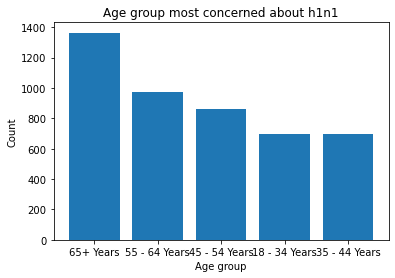

In [63]:
age_group_concern_count = train_set_features_df[train_set_features_df.h1n1_concern == 3].age_group.value_counts()

plot_bar(
    age_group_concern_count.index, 
    age_group_concern_count.values, 
    "Age group most concerned about h1n1",
    "Age group",
    "Count"
)

### How many of the concerned group have taken the vaccines ?

In [64]:
concern_vaccine_counts = train_set_features_df[['h1n1_concern','h1n1_vaccine']].value_counts()
# plot_bar(
#     concern_vaccine_counts.index,
#     concern_vaccine_counts.values
# )
concern_vaccine_counts

h1n1_concern  h1n1_vaccine
2.0           0               8102
1.0           0               6756
3.0           0               3250
0.0           0               2849
2.0           1               2473
1.0           1               1397
3.0           1               1341
0.0           1                447
dtype: int64

### Are people who are concerned about h1n1 have knowledge about h1n1 ??

Most people who are concerened have somewhat knowledge about h1n1

In [65]:
train_set_features_df[
    (train_set_features_df.h1n1_concern == 3) | (train_set_features_df.h1n1_concern == 2)].h1n1_knowledge.value_counts()

1.0    8170
2.0    5733
0.0    1213
Name: h1n1_knowledge, dtype: int64

In [66]:
train_set_features_df.h1n1_knowledge.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

### Most of the people have little knowledge of h1n1

In [67]:
train_set_features_df.behavioral_antiviral_meds.value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

### Most of the people haven't taken any anti viral meds

In [68]:
train_set_features_df.behavioral_face_mask.value_counts()

0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

### Most of the people haven't purchased any mask

In [69]:
train_set_features_df.behavioral_avoidance.value_counts()

1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

### Most people avoided closed contact with others having flu-like symptoms

### How many people who made close contact with infected people know about h1n1 ??

Approx 2k (8.5% of total) respondents knew about h1n1 and still were in close contact with infected people.

In [70]:
train_set_features_df[(train_set_features_df.behavioral_avoidance == 0) & (train_set_features_df.h1n1_knowledge == 2)].shape[0]

2273

In [71]:
train_set_features_df.behavioral_wash_hands.value_counts()

1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

### Most people do wash or sanitize their hands

### How many people knew about h1n1 and still didnt wash or sanitized their hands frequently ??

Around 1286 (~4%) people knew aout h1n1 and still didnt wash hands

In [72]:
train_set_features_df[(train_set_features_df.h1n1_knowledge == 2) & (train_set_features_df.behavioral_wash_hands == 0)].shape[0]

1286

In [73]:
train_set_features_df.behavioral_large_gatherings.value_counts()

0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

### Majority people avoid large gatherings

In [74]:
train_set_features_df.behavioral_outside_home.value_counts()

0.0    17644
1.0     8981
Name: behavioral_outside_home, dtype: int64

### Most people have not reduced contact outside their home

In [75]:
train_set_features_df.behavioral_touch_face.value_counts()

1.0    18001
0.0     8578
Name: behavioral_touch_face, dtype: int64

### Most people avoid touching their face eyes or mouth

In [76]:
train_set_features_df.doctor_recc_h1n1.value_counts()

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

### For most cases Doctors didnot recommend any h1n1 flu vaccine

In [77]:
train_set_features_df.doctor_recc_seasonal.value_counts()

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

### For most cases Doctors didnot recommend any seasonal flu vaccine 

In [78]:
train_set_features_df.chronic_med_condition.value_counts()

0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64

### In most cases patient didnot have any chronic medical condition

In [79]:
train_set_features_df.child_under_6_months.value_counts()

0.0    23749
1.0     2138
Name: child_under_6_months, dtype: int64

### Most cases patient didnot have any contact with children below 6 months old

In [80]:
train_set_features_df.health_worker.value_counts()

0.0    23004
1.0     2899
Name: health_worker, dtype: int64

### Most patients were not a health worker

In [81]:
train_set_features_df.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

### Most cases patient did have health insurance

### What was the income status of people having health insurance ?

In [82]:
train_set_features_df[train_set_features_df.health_insurance == 1].income_poverty.value_counts()

<= $75,000, Above Poverty    6413
> $75,000                    3703
Below Poverty                1067
Name: income_poverty, dtype: int64

### Do employed people only have health insurance ?

Some of the unemployed people (~500) still had insurance

In [83]:
train_set_features_df[train_set_features_df.health_insurance == 1].employment_status.value_counts()

Employed              6681
Not in Labor Force    5413
Unemployed             514
Name: employment_status, dtype: int64

In [84]:
train_set_features_df.opinion_h1n1_vacc_effective.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64

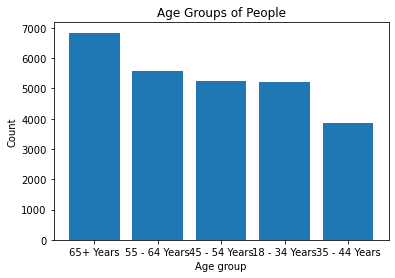

In [85]:
age_group_counts = train_set_features_df.age_group.value_counts()

plot_bar(
    age_group_counts.index, 
    age_group_counts.values, 
    "Age Groups of People",
    "Age group",
    "Count"
)

### Most cases of h1n1 was found for 65+ years age group

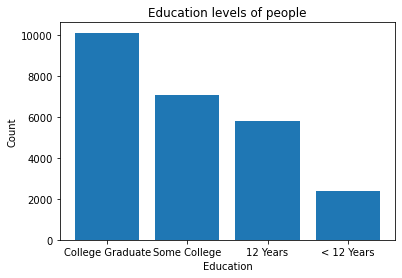

In [86]:
education_levels = train_set_features_df.education.value_counts()
plt.title("Education levels of people")
plt.ylabel("Count")
plt.xlabel("Education")
plt.bar(education_levels.index, education_levels.values);

### Most of people are college graduates

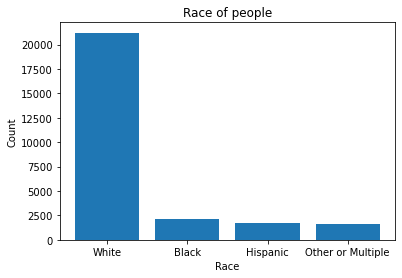

In [87]:
race_counts = train_set_features_df.race.value_counts()
plt.title("Race of people")
plt.ylabel("Count")
plt.xlabel("Race")
plt.bar(race_counts.index, race_counts.values);

### Most of the respondents are white people

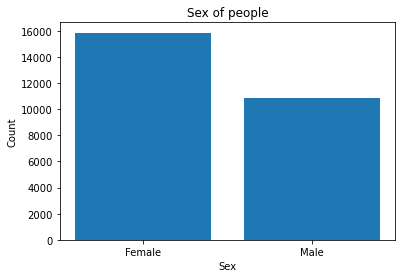

In [88]:
sex_counts = train_set_features_df.sex.value_counts()
plt.title("Sex of people")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.bar(sex_counts.index, sex_counts.values);

### More female respondents are present than males

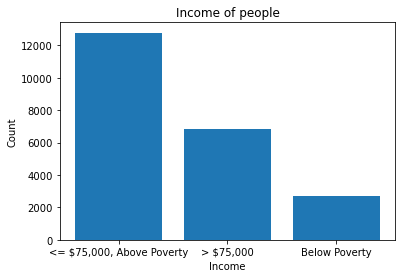

In [89]:
income_poverty_counts = train_set_features_df.income_poverty.value_counts()
plt.title("Income of people")
plt.ylabel("Count")
plt.xlabel("Income")
plt.bar(income_poverty_counts.index, income_poverty_counts.values);

### Most respondents seem to be above poverty level

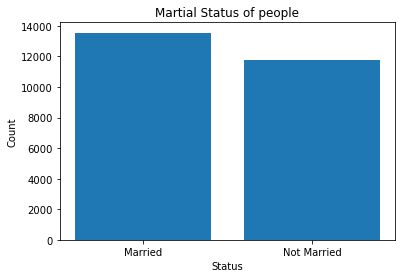

In [90]:
marital_status_counts = train_set_features_df.marital_status.value_counts()
plt.title("Martial Status of people")
plt.ylabel("Count")
plt.xlabel("Status")
plt.bar(marital_status_counts.index, marital_status_counts.values);

### We have almost equal number of married and unmarried respondents

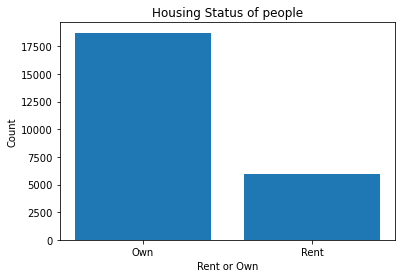

In [91]:
rent_status_counts = train_set_features_df.rent_or_own.value_counts()
plt.title("Housing Status of people")
plt.ylabel("Count")
plt.xlabel("Rent or Own")
plt.bar(rent_status_counts.index, rent_status_counts.values);

### Most respondents own their own house

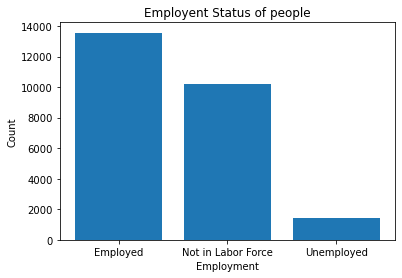

In [92]:
emp_status_counts = train_set_features_df.employment_status.value_counts()
plt.title("Employent Status of people")
plt.ylabel("Count")
plt.xlabel("Employment")
plt.bar(emp_status_counts.index, emp_status_counts.values);

### Most of the respodents seem to be employed

In [93]:
train_set_features_df.household_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

### Most households have only single Adult in the house

In [94]:
train_set_features_df.household_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

### Most household dont have a single child

In [95]:
train_set_features_df.employment_industry.value_counts()  # random chars

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [96]:
train_set_features_df.employment_occupation.value_counts() #random

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [97]:
train_set_features_df.hhs_geo_region.value_counts() #random

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

### Distribution of h1n1 and seasonal flu vaccines

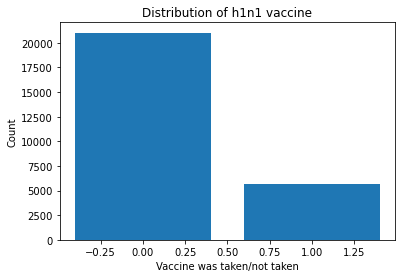

In [98]:
# train_set_features_df.h1n1_vaccine = train_set_features_df.h1n1_vaccine.map(lambda x: 'taken' if x==1 else 'not taken')
vaccine_counts = train_set_features_df.h1n1_vaccine.value_counts()
plot_bar(
    vaccine_counts.index,
    vaccine_counts.values,
    "Distribution of h1n1 vaccine",
    "Vaccine was taken/not taken",
    "Count"
)

Seems like this category is highly unbalanced towards people who haven't taken the h1n1 vaccine

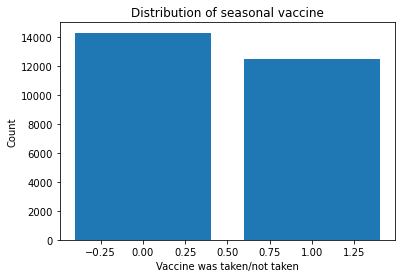

In [99]:
# train_set_features_df.seasonal_vaccine = train_set_features_df.seasonal_vaccine.map(lambda x: 'taken' if x==1 else 'not taken')
vaccine_counts = train_set_features_df.seasonal_vaccine.value_counts()
plot_bar(
    vaccine_counts.index,
    vaccine_counts.values,
    "Distribution of seasonal vaccine",
    "Vaccine was taken/not taken",
    "Count"
)

Seasonal vaccine seems to be balanced, almost equivalent number of people have taken the seasonal flu vaccine then those who haven't

In [100]:
train_set_features_df[['h1n1_concern', 'h1n1_knowledge', 'h1n1_vaccine']]

,h1n1_concern,h1n1_knowledge,h1n1_vaccine
0,1.0,0.0,0
1,3.0,2.0,0
2,1.0,1.0,0
3,1.0,1.0,0
4,2.0,1.0,0
...,...,...,...
26702,2.0,0.0,0
26703,1.0,2.0,0
26704,2.0,2.0,0
26705,1.0,1.0,0


### Correlation of h1n1 vaccine and related attributes

In [133]:
cols = ['h1n1_concern', 'h1n1_knowledge', 'health_insurance', 'health_worker', 'h1n1_vaccine']
# ref: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
h1n1_corr_related = train_set_features_df[cols].corr()
h1n1_corr_related.style.background_gradient() # ref:https://matplotlib.org/stable/tutorials/colors/colormaps.html

,h1n1_concern,h1n1_knowledge,health_insurance,health_worker,h1n1_vaccine
h1n1_concern,1.000000,0.062522,-0.003655,0.033562,0.121929
h1n1_knowledge,0.062522,1.000000,0.119408,0.170252,0.117951
health_insurance,-0.003655,0.119408,1.000000,0.046680,0.121170
health_worker,0.033562,0.170252,0.046680,1.000000,0.169768
h1n1_vaccine,0.121929,0.117951,0.121170,0.169768,1.000000


Seems like most of these features donot contribute to h1n1 vaccine

### Correlation between seasonal vaccine and related attributes

In [134]:
cols = ['h1n1_concern', 'h1n1_knowledge', 'health_insurance', 'health_worker', 'seasonal_vaccine']
seasonal_corr_related = train_set_features_df[cols].corr()
seasonal_corr_related.style.background_gradient()

,h1n1_concern,h1n1_knowledge,health_insurance,health_worker,seasonal_vaccine
h1n1_concern,1.000000,0.062522,-0.003655,0.033562,0.154828
h1n1_knowledge,0.062522,1.000000,0.119408,0.170252,0.120152
health_insurance,-0.003655,0.119408,1.000000,0.046680,0.200858
health_worker,0.033562,0.170252,0.046680,1.000000,0.127311
seasonal_vaccine,0.154828,0.120152,0.200858,0.127311,1.000000


Seems like most of these features donot contribute to h1n1 vaccine

### h1n1 vaccine and behavioural correlation

In [150]:
cols = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'h1n1_vaccine'
]
h1n1_behavioural_corr = train_set_features_df[cols].corr()
h1n1_behavioural_corr.style.background_gradient()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,h1n1_vaccine
behavioral_antiviral_meds,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.040608
behavioral_avoidance,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,0.047690
behavioral_face_mask,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.070498
behavioral_wash_hands,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.074712
behavioral_large_gatherings,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.017822
behavioral_outside_home,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.021768
behavioral_touch_face,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.071648
doctor_recc_h1n1,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,0.591868,0.158275,0.393890
doctor_recc_seasonal,0.030909,0.074088,0.069481,0.102044,0.093557,0.085622,0.100808,0.591868,1.000000,0.213806,0.209864
chronic_med_condition,0.008465,0.039435,0.068113,0.030260,0.104721,0.098858,0.028876,0.158275,0.213806,1.000000,0.095207


Doctor's reccommendation seems to be contributing towards h1n1 vaccination and seasonal vaccination

### Sesonal vaccine and bheavioural correlation

In [151]:
cols = [
    'behavioral_antiviral_meds',
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'chronic_med_condition',
    'seasonal_vaccine'
]
seasonal_behavioural_corr = train_set_features_df[cols].corr()
seasonal_behavioural_corr.style.background_gradient()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,seasonal_vaccine
behavioral_antiviral_meds,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.006277
behavioral_avoidance,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,0.076395
behavioral_face_mask,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.050083
behavioral_wash_hands,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.112414
behavioral_large_gatherings,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.064025
behavioral_outside_home,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.053509
behavioral_touch_face,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.120228
doctor_recc_h1n1,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,0.591868,0.158275,0.198607
doctor_recc_seasonal,0.030909,0.074088,0.069481,0.102044,0.093557,0.085622,0.100808,0.591868,1.000000,0.213806,0.369190
chronic_med_condition,0.008465,0.039435,0.068113,0.030260,0.104721,0.098858,0.028876,0.158275,0.213806,1.000000,0.170174


### H1n1 & seasonal vaccine correlation with opinion attributes

In [153]:
cols = [
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'h1n1_vaccine'
]
h1n1_opinion_corr = train_set_features_df[cols].corr()
h1n1_opinion_corr.style.background_gradient()

,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,h1n1_vaccine
opinion_h1n1_risk,1.000000,0.335062,0.224469,0.564208,0.198601,0.323265
opinion_h1n1_sick_from_vacc,0.335062,1.000000,0.078097,0.267013,0.491546,0.075091
opinion_seas_vacc_effective,0.224469,0.078097,1.000000,0.344800,-0.017340,0.179272
opinion_seas_risk,0.564208,0.267013,0.344800,1.000000,0.200379,0.258571
opinion_seas_sick_from_vacc,0.198601,0.491546,-0.017340,0.200379,1.000000,0.008360
h1n1_vaccine,0.323265,0.075091,0.179272,0.258571,0.008360,1.000000


In [154]:
cols = [
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'seasonal_vaccine'
]
seasonal_opinion_corr = train_set_features_df[cols].corr()
seasonal_opinion_corr.style.background_gradient()

,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,seasonal_vaccine
opinion_h1n1_risk,1.000000,0.335062,0.224469,0.564208,0.198601,0.216625
opinion_h1n1_sick_from_vacc,0.335062,1.000000,0.078097,0.267013,0.491546,0.027404
opinion_seas_vacc_effective,0.224469,0.078097,1.000000,0.344800,-0.017340,0.361875
opinion_seas_risk,0.564208,0.267013,0.344800,1.000000,0.200379,0.390106
opinion_seas_sick_from_vacc,0.198601,0.491546,-0.017340,0.200379,1.000000,-0.061510
seasonal_vaccine,0.216625,0.027404,0.361875,0.390106,-0.061510,1.000000


### Vaccinations and peronal atrributes correlation

In [164]:
from sklearn import preprocessing
## Encoding categorical variables - age_group, education, race, sex, income_poverty, maritial_status, rent_or_own, 
# employmant_status, employment_industry, employment_occupation
cols = [
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'employment_industry',
    'employment_occupation',
]
le = preprocessing.LabelEncoder()
for col in cols:
    train_set_features_df[col] = le.fit_transform(train_set_features_df[col])
train_set_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,oxchjgsf,Non-MSA,0.0,0.0,21,23,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,bhuqouqj,"MSA, Not Principle City",0.0,0.0,12,19,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,qufhixun,"MSA, Not Principle City",2.0,0.0,14,21,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,lrircsnp,"MSA, Principle City",0.0,0.0,21,23,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,qufhixun,"MSA, Not Principle City",1.0,0.0,18,5,0,0


In [167]:
cols = [
    'age_group',
    'education',
    'race',
    'sex',
    'income_poverty',
    'marital_status',
    'rent_or_own',
    'employment_status',
    'household_adults',
    'household_children',
    'employment_industry',
    'employment_occupation',
    'h1n1_vaccine',
    'seasonal_vaccine'
]
h1n1_personal_corr = train_set_features_df[cols].corr()
h1n1_personal_corr.style.background_gradient()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
age_group,1.000000,-0.088767,0.134898,-0.064209,-0.029130,-0.056104,-0.175420,0.125136,-0.252739,-0.446934,0.238515,0.246068,0.041074,0.277454
education,-0.088767,1.000000,0.048927,-0.006329,0.090380,0.176107,0.174008,0.180010,0.009047,0.072823,-0.039271,-0.057946,0.024694,0.002024
race,0.134898,0.048927,1.000000,0.007582,-0.095847,-0.118545,-0.168629,-0.042888,-0.031396,-0.113755,-0.019054,-0.021997,0.041061,0.101743
sex,-0.064209,-0.006329,0.007582,1.000000,-0.015661,-0.030344,0.033260,-0.032626,0.064799,-0.028112,-0.057378,0.008348,-0.020672,-0.077091
income_poverty,-0.029130,0.090380,-0.095847,-0.015661,1.000000,0.251606,0.398085,0.357965,0.066504,0.084739,0.149711,0.171450,-0.012236,-0.038593
marital_status,-0.056104,0.176107,-0.118545,-0.030344,0.251606,1.000000,0.476928,0.419797,-0.315386,-0.117577,0.163075,0.171896,-0.051018,-0.062536
rent_or_own,-0.175420,0.174008,-0.168629,0.033260,0.398085,0.476928,1.000000,0.448225,-0.053681,0.052062,0.157809,0.153001,-0.031816,-0.090845
employment_status,0.125136,0.180010,-0.042888,-0.032626,0.357965,0.419797,0.448225,1.000000,-0.028448,-0.020867,0.622901,0.607794,-0.021748,0.011684
household_adults,-0.252739,0.009047,-0.031396,0.064799,0.066504,-0.315386,-0.053681,-0.028448,1.000000,0.189571,-0.038497,-0.054417,0.007545,-0.064840
household_children,-0.446934,0.072823,-0.113755,-0.028112,0.084739,-0.117577,0.052062,-0.020867,0.189571,1.000000,-0.094298,-0.105287,-0.003320,-0.114614


<AxesSubplot:>

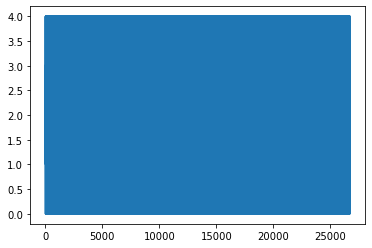

In [168]:
# Plot distribution of values
train_set_features_df.age_group.plot()